## Observations and Insights
#Capomulin and Ramicane have the lowest mean, median, and variance of all the drug regimens used in the study, while Ketapril and Naftisol have the lowest mean, median, and variance of all the drug regimens used.
#All drug regimens had between 150 and 250 data points spread across different timepoints.
#The split between male and female mice was very close to 50/50.
#All final tumor volumes for Capomulin and Ramicane were between 20-50 mm3, while the next 2 best-performing drugs (Infubinol and Ceftamin) had final tumor volumes of 60-75 mm3.
#There is a strong correlation between mouse weight and average tumor volume for the Capomulin drug regimen (Pearson's correlation coefficient = 0.84).

## Dependencies and starter code

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
alldata = pd.merge(mouse_metadata,study_results,on="Mouse ID", how="inner")

## Summary statistics

In [2]:
#Create groupby based on drug
drug_groupby = alldata.groupby(["Drug Regimen"])
mean_by_drug = drug_groupby.mean()

In [3]:
#Start summary statistics DF for mean tumor volume by drug
summary_stats = pd.DataFrame(mean_by_drug["Tumor Volume (mm3)"])
summary_stats = summary_stats.rename(columns={"Tumor Volume (mm3)":"Mean"})

#Append median tumor volume by drug
median_by_drug = drug_groupby.median()
summary_stats["Median"] = median_by_drug["Tumor Volume (mm3)"]

#Append variance of tumor volume
var_by_drug = drug_groupby.var()
summary_stats["Variance"] = var_by_drug["Tumor Volume (mm3)"]

#Append std deviation
std_dev_by_drug = drug_groupby.std()
summary_stats["Std Deviation"] = std_dev_by_drug["Tumor Volume (mm3)"]

#Append SEM
sem_by_drug = drug_groupby.sem()
summary_stats["Std Error of Mean (SEM)"] = sem_by_drug["Tumor Volume (mm3)"]
summary_stats

,Mean,Median,Variance,Std Deviation,Std Error of Mean (SEM)
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

In [4]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
# Create series for x-axis and y-axies
drugs = alldata["Drug Regimen"].unique()
drugs.sort()
datapts = drug_groupby.count()
datapts_x = datapts["Sex"]

(array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.]),
 <a list of 10 Text xticklabel objects>)

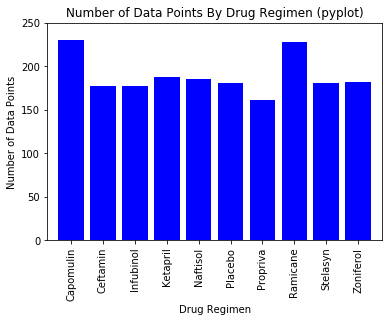

In [7]:
#Set up bar chart
plt.bar(drugs, datapts_x, color="b", align="center")
tick_locations = [value for value in drugs]
plt.xticks(tick_locations,drugs)
plt.xlim(-0.75,len(drugs)-0.25)
plt.ylim(0,max(datapts_x)+20)

#Create labels, rotate x-axis labels, sort drugs alphabetically
plt.title("Number of Data Points By Drug Regimen (pyplot)")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")
plt.xticks(rotation = 90)

In [8]:
#Clear plot
plt.show()

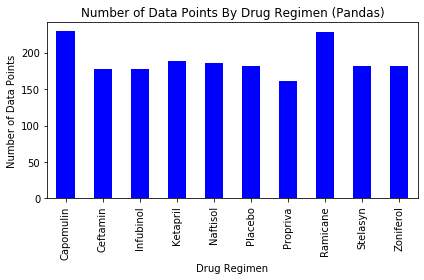

In [9]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
datapts_x.plot(kind="bar", facecolor="blue")

#Create labels, rotate x-axis labels, sort drugs alphabetically
plt.title("Number of Data Points By Drug Regimen (Pandas)")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")
plt.tight_layout()
plt.show()

## Pie plots

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
# Create a groupby based on sex
sex_groupby = alldata.groupby(["Sex"])

# Determine percent of each sex
count_by_sex = sex_groupby.count()/datapts_x.sum()*100
count_by_sex

,Mouse ID,Drug Regimen,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Sex,,,,,,,
Female,49.392499,49.392499,49.392499,49.392499,49.392499,49.392499,49.392499
Male,50.607501,50.607501,50.607501,50.607501,50.607501,50.607501,50.607501


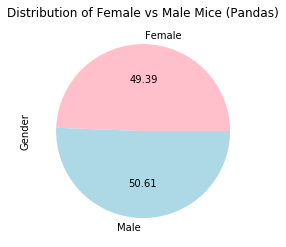

In [11]:
# Create pie plot using Pandas
gender_pie = count_by_sex["Mouse ID"].plot(kind="pie", y={"Female","Male"}, autopct='%.2f',
                                           colors=['pink','lightblue'],title = "Distribution of Female vs Male Mice (Pandas)")
gender_pie.set_ylabel("Gender")
plt.show()

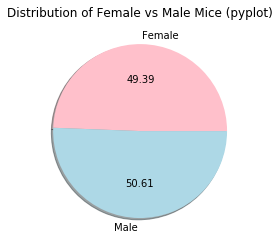

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Save gender counts as series
gender_count = sex_groupby.count()
gender_for_pie = gender_count["Mouse ID"]
gender_for_pie

labels = ["Female", "Male"]
colors = ["pink","lightblue"]
plt.pie(gender_for_pie, labels=labels, colors=colors,autopct="%.2f", shadow=True)
plt.title("Distribution of Female vs Male Mice (pyplot)")
plt.show()

## Quartiles, outliers and boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Create new DF for top 4 regimens
data_top4 = alldata.loc[(alldata["Drug Regimen"]=="Capomulin") | (alldata["Drug Regimen"]=="Ramicane") |
                        (alldata["Drug Regimen"]=="Infubinol") | (alldata["Drug Regimen"]=="Ceftamin"),:]

#Filter DF to only show rows for last timepoint
last_timept = data_top4.loc[data_top4["Timepoint"] == 45,:]

In [14]:
# Create DFs for final tumor volume for each of the top 4 drug regimens
data_cap = last_timept.loc[(last_timept["Drug Regimen"] == "Capomulin")]
final_vol_cap = data_cap["Tumor Volume (mm3)"]

data_cef = last_timept.loc[(last_timept["Drug Regimen"] == "Ceftamin")]
final_vol_cef = data_cef["Tumor Volume (mm3)"]

data_inf = last_timept.loc[(last_timept["Drug Regimen"] == "Infubinol")]
final_vol_inf = data_inf["Tumor Volume (mm3)"]

data_ram = last_timept.loc[(last_timept["Drug Regimen"] == "Ramicane")]
final_vol_ram = data_ram["Tumor Volume (mm3)"]

In [15]:
#Calculate quartiles and IQR for Capomulin
lowerq_cap = np.quantile(final_vol_cap, 0.25).round(3)
upperq_cap = np.quantile(final_vol_cap, 0.75).round(3)
iqr_cap = (upperq_cap - lowerq_cap).round(3)

print(f"The lower quartile of Capomulin tumor volume is: {lowerq_cap}")
print(f"The upper quartile of Capomulin tumor volume is: {upperq_cap}")
print(f"The interquartile range of Capomulin tumor volume is: {iqr_cap}")

lower_bound_cap = (lowerq_cap - (1.5*iqr_cap)).round(3)
upper_bound_cap = (upperq_cap + (1.5*iqr_cap)).round(3)
values_cap = final_vol_cap.values.round(3)
print(f"Values below {lower_bound_cap} could be outliers.")
print(f"Values above {upper_bound_cap} could be outliers.")
print(f"Capomulin final tumor volume values:{values_cap}")

The lower quartile of Capomulin tumor volume is: 32.377
The upper quartile of Capomulin tumor volume is: 40.159
The interquartile range of Capomulin tumor volume is: 7.782
Values below 20.704 could be outliers.
Values above 51.832 could be outliers.
Capomulin final tumor volume values:[23.344 28.484 28.431 31.024 31.896 32.377 33.329 34.455 37.312 36.041
 37.074 38.847 38.94  38.983 38.125 40.658 40.159 40.729 41.483 41.582
 47.686]


In [16]:
#Calculate quartiles and IQR for Ceftamin
lowerq_cef = np.quantile(final_vol_cef, 0.25).round(3)
upperq_cef = np.quantile(final_vol_cef, 0.75).round(3)
iqr_cef = (upperq_cef - lowerq_cef).round(3)

print(f"The lower quartile of Ceftamin tumor volume is: {lowerq_cef}")
print(f"The upper quartile of Ceftamin tumor volume is: {upperq_cef}")
print(f"The interquartile range of Ceftamin tumor volume is: {iqr_cef}")

lower_bound_cap = (lowerq_cef - (1.5*iqr_cef)).round(3)
upper_bound_cap = (upperq_cef + (1.5*iqr_cef)).round(3)
values_cef = final_vol_cef.values.round(3)
print(f"Values below {lower_bound_cap} could be outliers.")
print(f"Values above {upper_bound_cap} could be outliers.")
print(f"Ceftamin final tumor volume values:{values_cef}")

The lower quartile of Ceftamin tumor volume is: 61.434
The upper quartile of Ceftamin tumor volume is: 67.527
The interquartile range of Ceftamin tumor volume is: 6.093
Values below 52.294 could be outliers.
Values above 76.666 could be outliers.
Ceftamin final tumor volume values:[62.999 61.849 68.923 67.749 59.852 64.3   59.742 61.434 67.527 64.635
 61.387 68.595 64.73 ]


In [17]:
#Calculate quartiles and IQR for Infubinol
lowerq_inf = np.quantile(final_vol_inf, 0.25).round(3)
upperq_inf = np.quantile(final_vol_inf, 0.75).round(3)
iqr_inf = (upperq_inf - lowerq_inf).round(3)

print(f"The lower quartile of Infubinol tumor volume is: {lowerq_inf}")
print(f"The upper quartile of Infubinol tumor volume is: {upperq_inf}")
print(f"The interquartile range of Infubinol tumor volume is: {iqr_inf}")

lower_bound_inf = (lowerq_inf - (1.5*iqr_inf)).round(3)
upper_bound_inf = (upperq_inf + (1.5*iqr_inf)).round(3)
values_inf = final_vol_inf.values.round(3)
print(f"Values below {lower_bound_inf} could be outliers.")
print(f"Values above {upper_bound_inf} could be outliers.")
print(f"Infubinol final tumor volume values:{values_inf}")

The lower quartile of Infubinol tumor volume is: 62.754
The upper quartile of Infubinol tumor volume is: 67.686
The interquartile range of Infubinol tumor volume is: 4.932
Values below 55.356 could be outliers.
Values above 75.084 could be outliers.
Infubinol final tumor volume values:[67.973 65.526 66.083 72.227 62.435 60.919 66.197 67.686 62.754]


In [18]:
#Calculate quartiles and IQR for Ramicane
lowerq_ram = np.quantile(final_vol_ram, 0.25).round(3)
upperq_ram = np.quantile(final_vol_ram, 0.75).round(3)
iqr_ram = (upperq_ram - lowerq_ram).round(3)

print(f"The lower quartile of Ramicane tumor volume is: {lowerq_ram}")
print(f"The upper quartile of Ramicane tumor volume is: {upperq_ram}")
print(f"The interquartile range of Ramicane tumor volume is: {iqr_ram}")

lower_bound_ram = (lowerq_ram - (1.5*iqr_ram)).round(3)
upper_bound_ram = (upperq_ram + (1.5*iqr_ram)).round(3)
values_ram = final_vol_ram.values.round(3)
print(f"Values below {lower_bound_ram} could be outliers.")
print(f"Values above {upper_bound_ram} could be outliers.")
print(f"Ramicane final tumor volume values:{values_ram}")

The lower quartile of Ramicane tumor volume is: 30.981
The upper quartile of Ramicane tumor volume is: 38.508
The interquartile range of Ramicane tumor volume is: 7.527
Values below 19.69 could be outliers.
Values above 49.799 could be outliers.
Ramicane final tumor volume values:[22.05  29.128 30.276 30.565 30.639 31.56  31.095 33.398 32.979 33.562
 36.135 38.81  37.226 36.375 37.311 38.408 40.659 40.668 45.221 43.048]


[None, None, None, None, None, None, None, None]

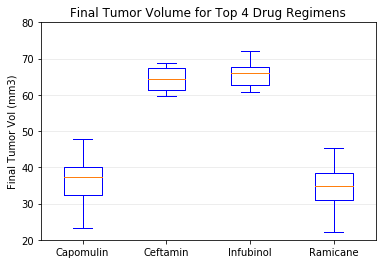

In [19]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1,ax1 = plt.subplots()
ax1.set_title("Final Tumor Volume for Top 4 Drug Regimens")
ax1.set_label("Final Tumor Vol (mm3)")

box_data = list([final_vol_cap, final_vol_cef, final_vol_inf, final_vol_ram])
bp=ax1.boxplot(box_data)

# Format box plot
ax1.set_xticklabels(["Capomulin","Ceftamin","Infubinol","Ramicane"])
ax1.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',
               alpha=0.5)
ax1.set_ylim(20,80)
plt.setp(bp['boxes'], color='b')
plt.setp(bp['whiskers'],color='b')
plt.setp(bp['caps'],color='b')
ax1.set_ylabel("Final Tumor Vol (mm3)")

# Create different color and symbol for outliers
plt.setp(bp['fliers'], color='red', marker='+')

## Line and scatter plots

In [3]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
# Filter a single Capomulin mouse into a new DF
line_data = alldata.loc[(alldata["Mouse ID"] == "b742"),:]

(36.95035546, 46.0)

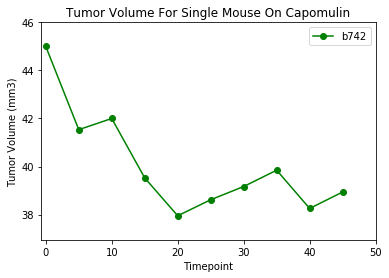

In [21]:
# Create line plot
x_axis = line_data["Timepoint"]
line_y = line_data["Tumor Volume (mm3)"]
handle = plt.plot(x_axis,line_y,marker = "o", color='g', label="b742")

#Add labels, legend and limits
plt.title("Tumor Volume For Single Mouse On Capomulin")
plt.legend(loc="best")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.xlim(-0.75,max(x_axis)+5)
plt.ylim(min(line_data["Tumor Volume (mm3)"])-1,max(line_data["Tumor Volume (mm3)"])+1)

In [4]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
# Determine mean tumor volume per mouse
alldata_cap = alldata.loc[(alldata["Drug Regimen"]=="Capomulin"),:]
alldata_cap_group = alldata_cap.groupby(["Mouse ID"])
alldata_cap_mean = alldata_cap_group.mean()   
scatter_tumorvol = alldata_cap_mean['Tumor Volume (mm3)']

#Create series for mouse weight
scatter_weight = alldata_cap_mean["Weight (g)"]

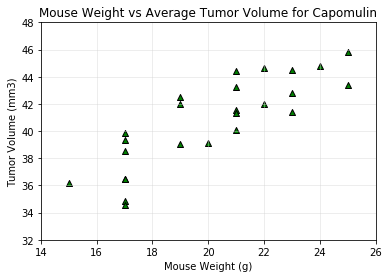

In [65]:
#Create scatter plot
x_limit = (scatter_weight.max())+1
plt.scatter(scatter_weight, scatter_tumorvol, marker="^", facecolors='g',edgecolors='k')
plt.xlim(14,x_limit)
plt.ylim(32,48)

#Create plot title, limits, and labels
plt.title("Mouse Weight vs Average Tumor Volume for Capomulin")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.grid(True, linestyle='-', which='major', color='lightgrey',
               alpha=0.5)

plt.show()

In [74]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
corr_df = pd.DataFrame({"Weight (g)": scatter_weight, "Tumor Volume (mm3)": scatter_tumorvol})

pearsoncorr = corr_df.corr(method='pearson')
print(pearsoncorr)

                    Weight (g)  Tumor Volume (mm3)
Weight (g)            1.000000            0.841936
Tumor Volume (mm3)    0.841936            1.000000


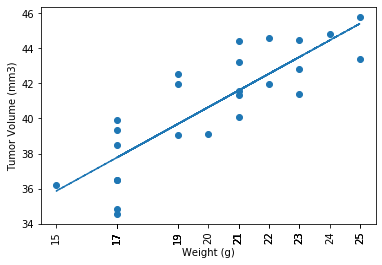

In [76]:
from scipy import stats

# Perform a linear regression on year versus violent crime rate
vc_slope, vc_int, vc_r, vc_p, vc_std_err = stats.linregress(scatter_weight, scatter_tumorvol)

# Create equation of line to calculate predicted violent crime rate
vc_fit = vc_slope * scatter_weight + vc_int

# Plot the linear model on top of scatter plot 
scatter_weight = alldata_cap_mean["Weight (g)"]
scatter_tumorvol = alldata_cap_mean['Tumor Volume (mm3)']
plt.scatter(scatter_weight,scatter_tumorvol)
plt.plot(scatter_weight,vc_fit,"--")
plt.xticks(scatter_weight, rotation=90)
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()